# Name      :   Yohan Abeysinghe
# Index No  :   190014F

In [2]:
import sympy
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image 

1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.

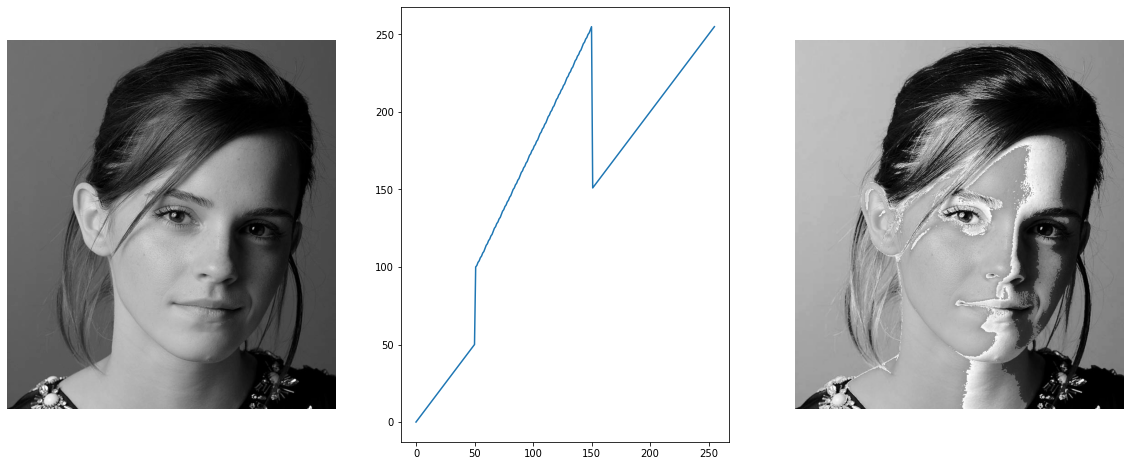

In [3]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(51,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(151,255,105)

t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,3, figsize = (20,8))
ax[0].imshow(f,cmap='gray')
ax[0].axis('off')
ax[1].plot(t)

g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
ax[2].axis('off')
ax[2].imshow(img)
plt.show()

2. Apply a similar operation as above (question 1) to accentuate

2(a) white matter in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.

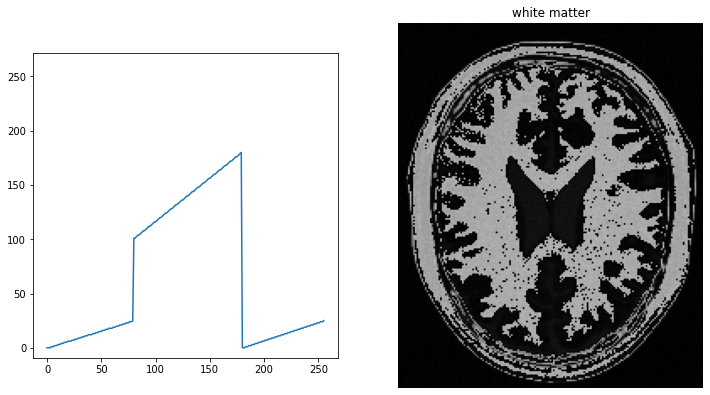

In [4]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,25,80)
t2 = np.linspace(26,100,0)
t3 = np.linspace(101,180,100)
t4 = np.linspace(0,25,76)

t = np.concatenate((t1,t2,t3,t4), axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,2, figsize = (12,8))
ax[0].plot(t)
ax[0].axis('square')
g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title('white matter')
ax[1].imshow(img)
plt.show()

2(b) gray matter in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.

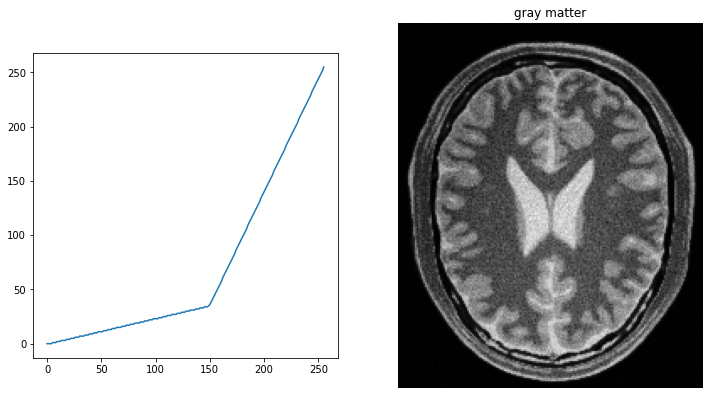

In [6]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None


t1 = np.linspace(0,35,150)
t2 = np.linspace(36,255,106)


t = np.concatenate((t1,t2), axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].plot(t)
ax[0].axis('square')
g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
ax[1].imshow(img)
ax[1].set_title('gray matter')
ax[1].axis('off')
plt.show()

3. Consider the image shown in Fig. 31. [3]

3(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.

(b) Show the histograms of the original and corrected images.

4. Write a function of your own to carry out histogram equalization on the image shown in Fig. 4. Show the histograms before and after equalization.

5. Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image, which can handle

5(a) nearest-neighbor, and

5(b) bilinear interpolation.

6. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 5

6(a) Using the existing filter2D to Sobel filter the image.

6(b) Write your own code to Sobel filter the image.

6(c) Using the property carry out Sobel filtering.

7. Fig. 62 shows a flower image with both the foreground and background are in focus.

7(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and background image.

7(b) Produce an enhanced image with a substantially blurred background. Display the original image alongside the enhanced image.

(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?